# Predicting annual incomes using machine learning

Note: the following project is based on [this guided project](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-3-structured-data-projects/end-to-end-heart-disease-classification-video.ipynb) by [Daniel Bourke](https://github.com/mrdbourke)

Table of contents:
- [Problem definition](#Problem-definition)
- [Data](#Data)
- [Evaluation](#Evaluation)
- [Features](#Features)
- [Preparing the tools](#Preparing-the-tools)
    - [Models documentations](#Models-docs)
- [Loading data](#Loading-data)
- [Exploratory Data Analysis](#EDA)
    - [Creating the correlation matrix](#Creating-the-correlation-matrix)
    - [The role of race according to annual income](#The-role-of-race-according-to-annual-income)
    - [Relationship status according to annual income](#Relationship-status-according-to-annual-income)
- [Modelling](#Modelling)
    - [Creating a baseline](#Creating-a-baseline)
- [Hyperparameter tuning](#Hyperparameter-tuning)
    - [Tuning K Nearest Neighbors](#Tuning-K-Nearest-Neighbors)
    - [Tuning LinearSVC](#Tuning-LinearSVC)
    - [Tuning Random Forest Classifier](#Tuning-Random-Forest-Classifier)
- [Model evaluation](#Model-evaluation)
    - [ROC curve](#ROC-curve)
    - [Confusion matrix](#Confusion-matrix)
    - [Using cross-validation](#Using-cross-validation)
    - [Cross-validated metrics visualized](#Cross-validated-metrics-visualized)
- [Feature importance](#Feature-importance)
- [Conclusion](#Conclusion)

## Problem definition

Given a datasets about workers from all over the world we have to predict whether they have income greater than 50 thousands dollars at year or not

## Data

Data source: http://archive.ics.uci.edu/ml/datasets/Adult

There is another version at: https://www.kaggle.com/uciml/adult-census-income

## Evaluation

> If we can reach a 95% of accuracy at predicting the annual income ( more or less than 50k per year) we'll pursue the project

## Features

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
> annual income: \>50K, <=50K.

## Preparing the tools

In [1]:
# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots in the notebook
%matplotlib inline

# classification models
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# model selections
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve

# one hot encoding
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# eliminate warning
import warnings
warnings.filterwarnings('ignore')

### Models docs

- **KNN documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
- **RandomForestClassifier documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
- **LinearSVC documentation:** https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

## Loading data

In [2]:
df = pd.read_csv('data/adult-data.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


because the data has no header we have to set the column names manually

In [3]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
              'marital-status', 'occupation', 'relationship', 'race', 'sex',
              'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'annual-income']

## EDA

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


finding out how many people have an income superior than 50k per year

In [6]:
df['annual-income'].value_counts()

 <=50K    24720
 >50K      7841
Name: annual-income, dtype: int64

In [7]:
# viewing it in percentage
df['annual-income'].value_counts(normalize = True)

 <=50K    0.75919
 >50K     0.24081
Name: annual-income, dtype: float64

In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
annual-income     object
dtype: object

In [9]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual-income     0
dtype: int64

### Creating the correlation matrix

In [10]:
corr_matrix = df.corr()
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


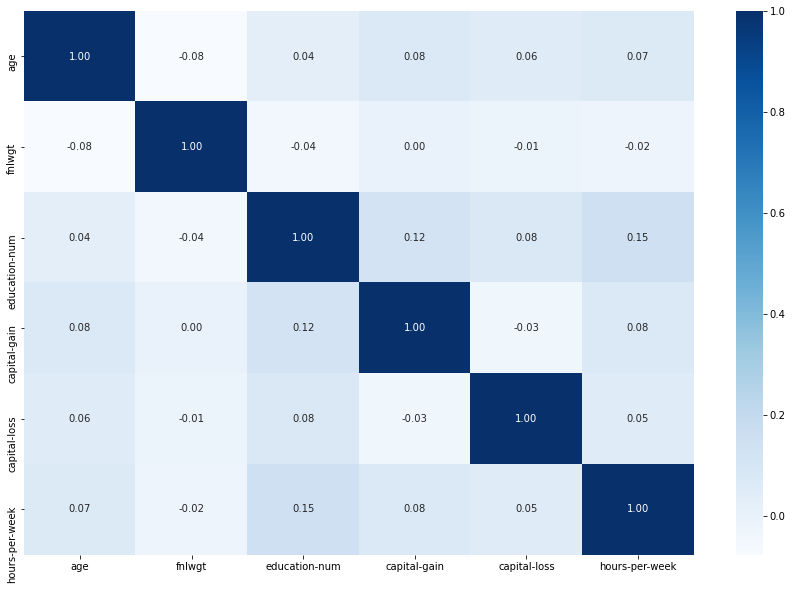

In [11]:
# making it more visual
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 fmt = '.2f',
                 cmap = 'Blues')

The correlation matrix can be done only between numerical values, which are something that we lack. <br>
We'll have to explore our data more manually.

### The role of race according to annual income

In [12]:
pd.crosstab(df.race, df['annual-income'])

annual-income,<=50K,>50K
race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20699,7117


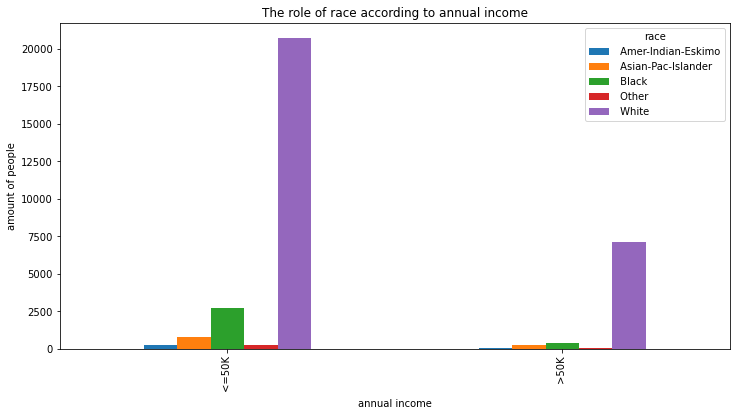

In [13]:
pd.crosstab(df.race, df['annual-income']).T.plot(kind = 'bar',
                                                 title = 'The role of race according to annual income',
                                                 figsize = (12, 6),
                                                 xlabel = 'annual income',
                                                 ylabel = 'amount of people');

This plot mat sound scary at a first glance, but we can notice that the majority of the datasets is made of whie people

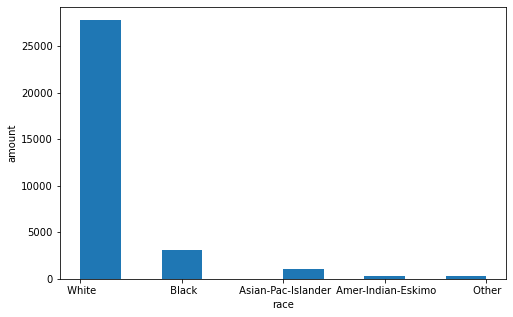

In [14]:
fig, ax = plt.subplots(figsize = (8, 5))
hist_plot = plt.hist(df.race)
hist_plot = ax.set(xlabel = 'race',
                   ylabel = 'amount')

### Relationship status according to annual income

In [15]:
pd.crosstab(df.relationship, df['annual-income']).T

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
annual-income,,,,,,
<=50K,7275,7449,944,5001,3228,823
>50K,5918,856,37,67,218,745


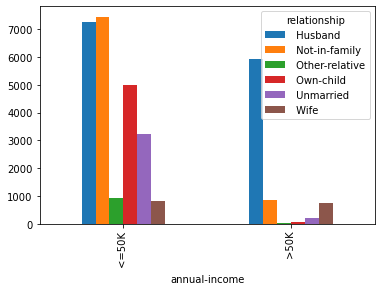

In [16]:
pd.crosstab(df.relationship, df['annual-income']).T.plot.bar();

## Modelling

In [17]:
# splitting data into train and test
np.random.seed(10)

X = df.drop('annual-income', axis = 1)
y = df['annual-income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15)

We're going to try 3 different models:

- K Nearest Neighbors
- Random Forest Classifier
- linear SVC

### Creating a baseline

We'll create a baseline for our models based on the basic `score` function that they have

In [18]:
def create_baseline(models, X_train, X_test, y_train, y_test):
    """
    fit and evalute machine learning models, returns a dict containing
    the baseline of their predictions.
    Models: dict with machine learning models in it
    X_train: train data (no labels)
    X_test: test data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set up random seed
    np.random.seed(10)
    # make dict to store models
    baselines = {}
    # iterate the models dict
    for name, model in models.items():
        # fit the model
        print(f'Fitting {name}...')
        model.fit(X_train, y_train)
        print(f'{name} has been fitted!')
        # store and evalute the model
        print(f'Evaluating {name}...')
        baselines[name] = model.score(X_test, y_test)
        print(f'{name} has been evaluated! \nIt scored {baselines[name]*100:.2f}%')
        print('-' * 20)
    # return the dict containing the baselines
    return baselines

before using our function we have to one-hot encode some columns, <br>
to do so we can create a Pipeline

In [19]:
# creating the pipeline to one-hot encode certain features

# storing the column to encode
encoding_objects_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                  'race', 'sex', 'native-country']
#creating the encoder
encoding_objects_transformer = Pipeline(steps = [
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])
# creating the preprocessor
preprocessor = ColumnTransformer(transformers = [
    ('one_hot_encoding', encoding_objects_transformer, encoding_objects_features)
], remainder = 'passthrough', verbose = 0)

In [20]:
# creating the models
# K Nearest Neighbors
KNN = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier())
])
# Random Forest Classifier
RFC = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])
# Linear SVC
SVC = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', LinearSVC())
])

In [21]:
models = {'K Nearest Neighbors': KNN,
          'Random Forest Classifier': RFC,
          'Linear SVC': SVC}

In [22]:
baselines = create_baseline(models, X_train, X_test, y_train, y_test)
baselines

Fitting K Nearest Neighbors...
K Nearest Neighbors has been fitted!
Evaluating K Nearest Neighbors...
K Nearest Neighbors has been evaluated! 
It scored 77.48%
--------------------
Fitting Random Forest Classifier...
Random Forest Classifier has been fitted!
Evaluating Random Forest Classifier...
Random Forest Classifier has been evaluated! 
It scored 84.40%
--------------------
Fitting Linear SVC...
Linear SVC has been fitted!
Evaluating Linear SVC...
Linear SVC has been evaluated! 
It scored 78.01%
--------------------


{'K Nearest Neighbors': 0.77482088024565,
 'Random Forest Classifier': 0.8440122824974411,
 'Linear SVC': 0.7801432958034801}

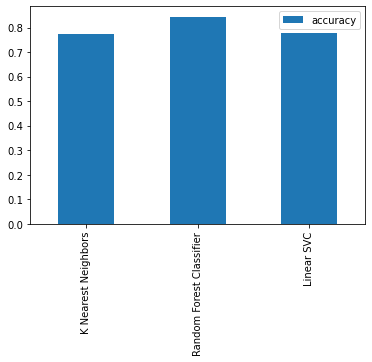

In [23]:
baseline_df = pd.DataFrame(baselines, index = ['accuracy'])
baseline_df.T.plot.bar();

## Hyperparameter tuning

### Tuning K Nearest Neighbors

Hyperparameters we'll tune:
* `n_neighbors`
* `weights`

In [24]:
# setting the grid
knn_grid = {'model__n_neighbors': np.arange(1, 30),
            'model__weights': ['uniform', 'distance']}

In [25]:
# setting up the random search for best hyperparameters
rs_knn = RandomizedSearchCV(estimator = KNN,
                            param_distributions = knn_grid,
                            cv = 5,
                            n_iter = 5,
                            verbose = True)

In [26]:
# fitting random hyperparameters search
rs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoding',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['workclass',
                                                                                'education',
                                                                                'marital-status',
                                                                                'occupation',
                                                                                'relationship',
      

In [27]:
# check best hyperparameters
rs_knn.best_params_

{'model__weights': 'uniform', 'model__n_neighbors': 18}

In [28]:
# evalute model
rs_knn.score(X_test, y_test)

0.7930399181166837

### Tuning LinearSVC

Hyperparameters we'll tune:
* `C`
* `max_iter`

In [29]:
SVC_grid = {'model__C': np.arange(1, 100, 9),
            'model__max_iter': np.arange(2000, 5000, 1000)}

In [30]:
SVC_grid['model__max_iter']

array([2000, 3000, 4000])

In [31]:
# setting up the random search for best hyperparameters
rs_SVC = RandomizedSearchCV(estimator = SVC,
                            param_distributions = SVC_grid,
                            cv = 5,
                            n_iter = 5,
                            verbose = True)

In [32]:
rs_SVC.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoding',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['workclass',
                                                                                'education',
                                                                                'marital-status',
                                                                                'occupation',
                                                                                'relationship',
      

In [33]:
rs_SVC.best_params_

{'model__max_iter': 3000, 'model__C': 10}

In [34]:
rs_SVC.score(X_test, y_test)

0.7694984646878199

The linearSVC model offered a worse performance than the baseline, we'll drop it

### Tuning Random Forest Classifier

In [35]:
RFC_grid = {'model__n_estimators': [5, 10, 50, 100, 250],
            'model__max_depth': [2, 4, 8, 16, 32, None]}

In [36]:
rs_RFC = RandomizedSearchCV(estimator = RFC,
                            param_distributions = RFC_grid,
                            cv = 5,
                            n_iter = 5,
                            verbose = True)

In [37]:
rs_RFC.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoding',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['workclass',
                                                                                'education',
                                                                                'marital-status',
                                                                                'occupation',
                                                                                'relationship',
      

In [38]:
rs_RFC.score(X_test, y_test)

0.851381780962129

In [39]:
baselines

{'K Nearest Neighbors': 0.77482088024565,
 'Random Forest Classifier': 0.8440122824974411,
 'Linear SVC': 0.7801432958034801}

In [40]:
rs_RFC.best_params_

{'model__n_estimators': 100, 'model__max_depth': 16}

Of all of them, `RandomForestClassifier` has been the best so we'll focus on it

## Model evaluation

Metrics:

* confusion matrix
* precision score
* f1 score
* classification report
* recall score
* plot roc curve

In [41]:
# making preds
y_preds = rs_RFC.predict(X_test)

### ROC curve

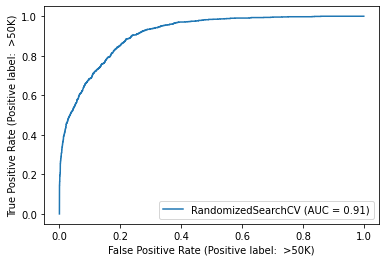

In [42]:
plot_roc_curve(rs_RFC, X_test, y_test);

### Confusion matrix

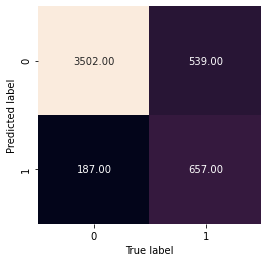

In [43]:
fig, ax = plt.subplots(figsize = (4,4))
ax = sns.heatmap(confusion_matrix(y_preds, y_test),
                 annot = True,
                 cbar = False,
                 fmt = '.2f')
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [44]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      3689
        >50K       0.78      0.55      0.64      1196

    accuracy                           0.85      4885
   macro avg       0.82      0.75      0.78      4885
weighted avg       0.85      0.85      0.84      4885



### Using cross-validation

We want to cross validate result with the following scores:
* Accuracy
* Precision
* Recall
* F1

Before doing so we have to binarize our data, but strangely enough `LabelBinarize()` doesn't work in this case (at least on my machine), to use our data we have to first binarize it in a more manual way

In [45]:
rs_RFC.best_params_

{'model__n_estimators': 100, 'model__max_depth': 16}

In [46]:
clf = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators = 250,
                                     max_depth = 16))
]) 

In [47]:
# Binaryzing our data

# create y series full of zeros
binary_y = np.zeros((len(df['annual-income'])))

# because this is a binary classification model
# we can just change 0 to 1 if the value is positive
# iterate through the array
for i in range(len(df['annual-income'])):
    if df['annual-income'][i] == ' >50K':
        binary_y[i] = 1

# serialize the array
binary_y = pd.Series(binary_y)

We are just creating another Series that mimic the `annual-income` column, but this was the only solution I finded

In [48]:
def cross_val_scores (scores_list, model, X, y, cross_val = 5):
    """
    cross validate different scores and return a dict 
    with their values
    - scores_list: an arrya containing the names of the scores.
    ex. ['accuracy', 'precision']
    - model: machine learning model to use
    - X: the X labeled data
    - Y: the target data to predict
    - cv: cross-validation score, set by default on 5
    """
    # create dict to return
    cross_validated_scores = dict()
    # loop through the scores_list
    for score_name in scores_list:
        print(f'scoring {score_name}...')
        # put mean of the cv scores in a var
        mean_cv_value = np.mean(cross_val_score(model, X, y, 
                        cv = cross_val, 
                        scoring = score_name))
        print(f'{score_name} has scored {mean_cv_value * 100:.2f}%')       
        cross_validated_scores[score_name + ' score'] = mean_cv_value
    return cross_validated_scores

In [49]:
cross_validate_metrics = cross_val_scores(['accuracy', 'precision', 'recall', 'f1'], 
                                          clf, 
                                          X, 
                                          binary_y, 
                                          cross_val = 5)

scoring accuracy...
accuracy has scored 86.16%
scoring precision...
precision has scored 79.07%
scoring recall...
recall has scored 57.89%
scoring f1...
f1 has scored 66.70%


### Cross-validated metrics visualized

In [50]:
metrics_df = pd.DataFrame(cross_validate_metrics, index = [0])

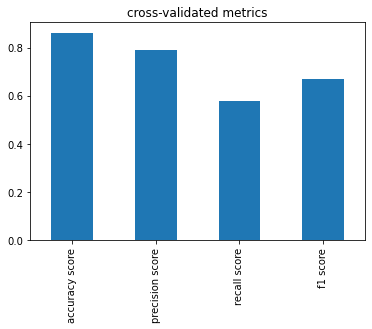

In [51]:
metrics_df.T.plot.bar(legend = False,
                      title = 'cross-validated metrics');

## Feature importance

In [52]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoding',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])],
                                   verbose=0)),
                ('model',
                 RandomForestClassifier(max_depth=16, n_estimators=250))])

In [53]:
features_importance = clf['model'].feature_importances_

In [54]:
features_dict = dict(zip(df.columns, list(features_importance)))
features_dict

{'age': 0.0020737278436254655,
 'workclass': 0.004584627234455506,
 'fnlwgt': 0.0030368662320578842,
 'education': 1.5648696166818259e-06,
 'education-num': 0.005911959863011839,
 'marital-status': 0.005886172520227823,
 'occupation': 0.007122797818630074,
 'relationship': 0.0025807701826285473,
 'race': 2.2226010813990908e-05,
 'sex': 0.0011937123607251984,
 'capital-gain': 0.0020829884777472845,
 'capital-loss': 0.00046546428208903964,
 'hours-per-week': 0.00030652036175416277,
 'native-country': 0.0008177653994285121,
 'annual-income': 0.0031286044552700657}

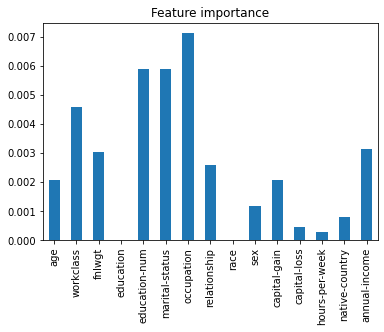

In [55]:
features_df = pd.DataFrame(features_dict, index = [0])
features_df.T.plot.bar(legend = False,
                       title = 'Feature importance');

## Conclusion

The project has not reached the target, but we discovered useful information in the process